로지스틱회귀분석

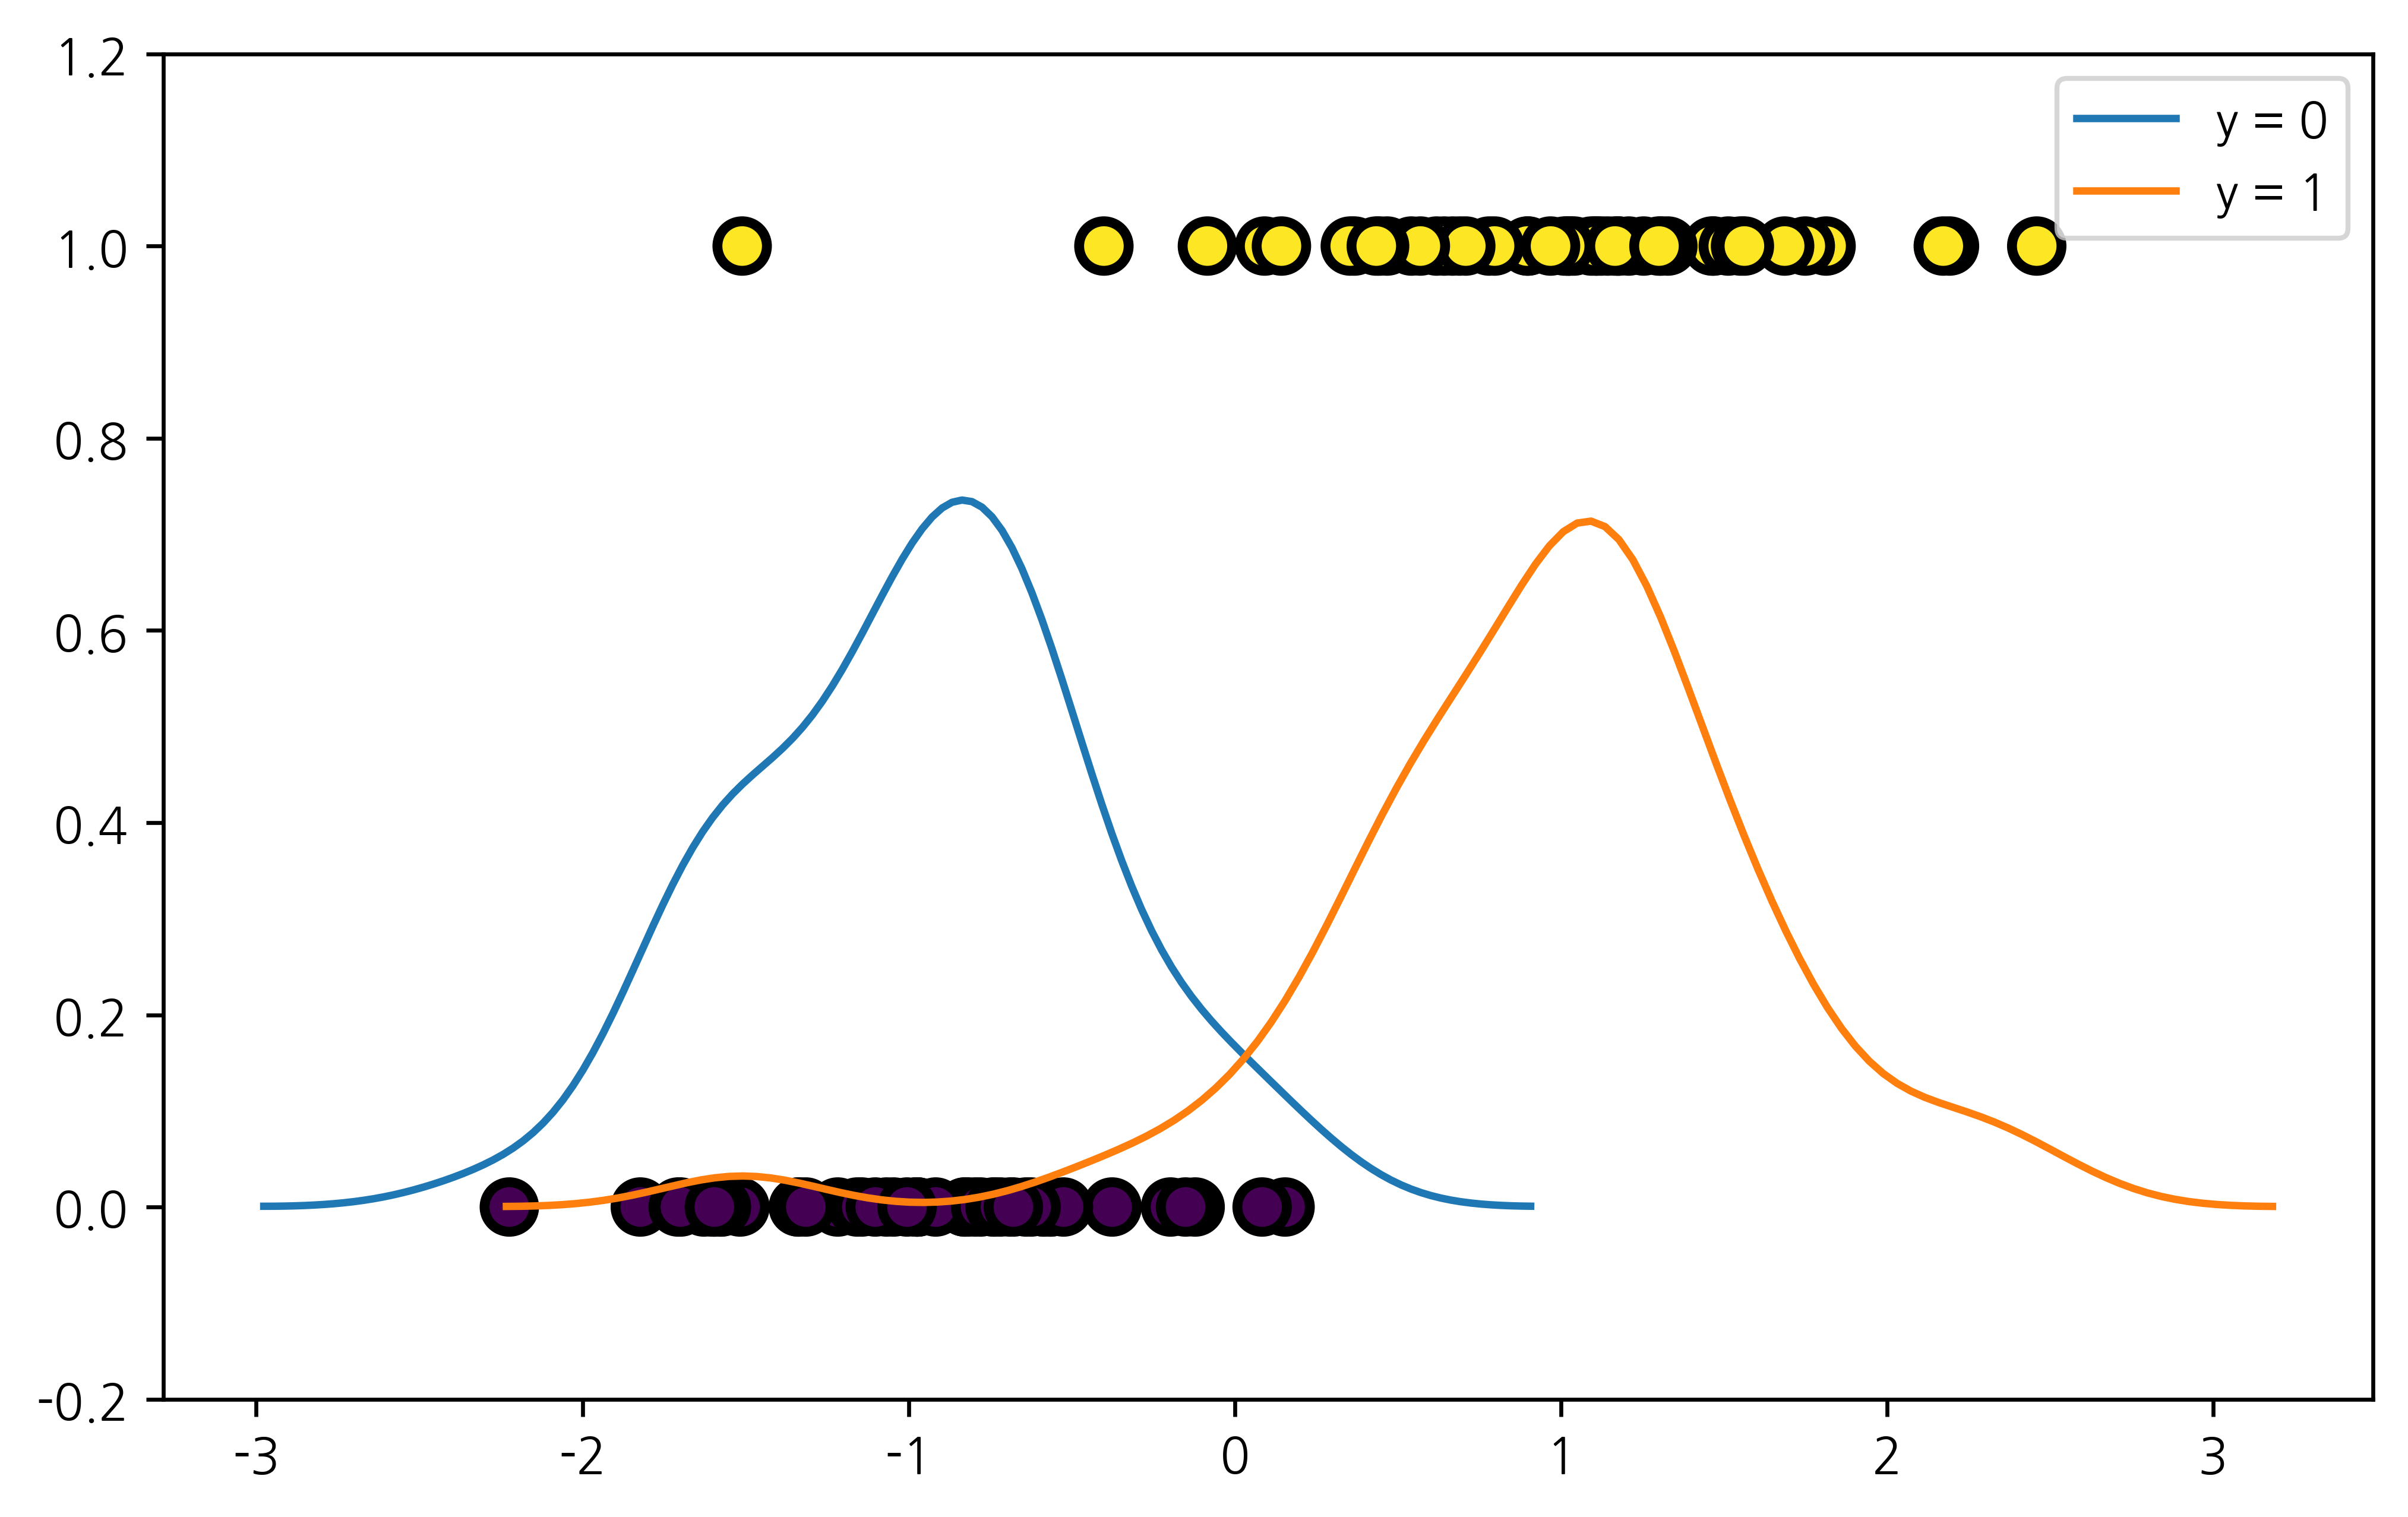

In [1]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

In [2]:
X= sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 May 2020   Pseudo R-squ.:                  0.7679
Time:                        20:43:00   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


연습문제 1

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1]) # 0,1값만 가져오기
X0 = iris.data[idx, :1]
X = sm.add_constant(X0)
y = iris.target[idx]

In [4]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 May 2020   Pseudo R-squ.:                  0.5368
Time:                        20:43:00   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


In [5]:
logit_res.params

array([-27.83145099,   5.14033614])

In [6]:
-logit_res.params[0] / logit_res.params[1]

5.41432510257189

In [8]:
y_pred = logit_res.predict(X) >= 0.5

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



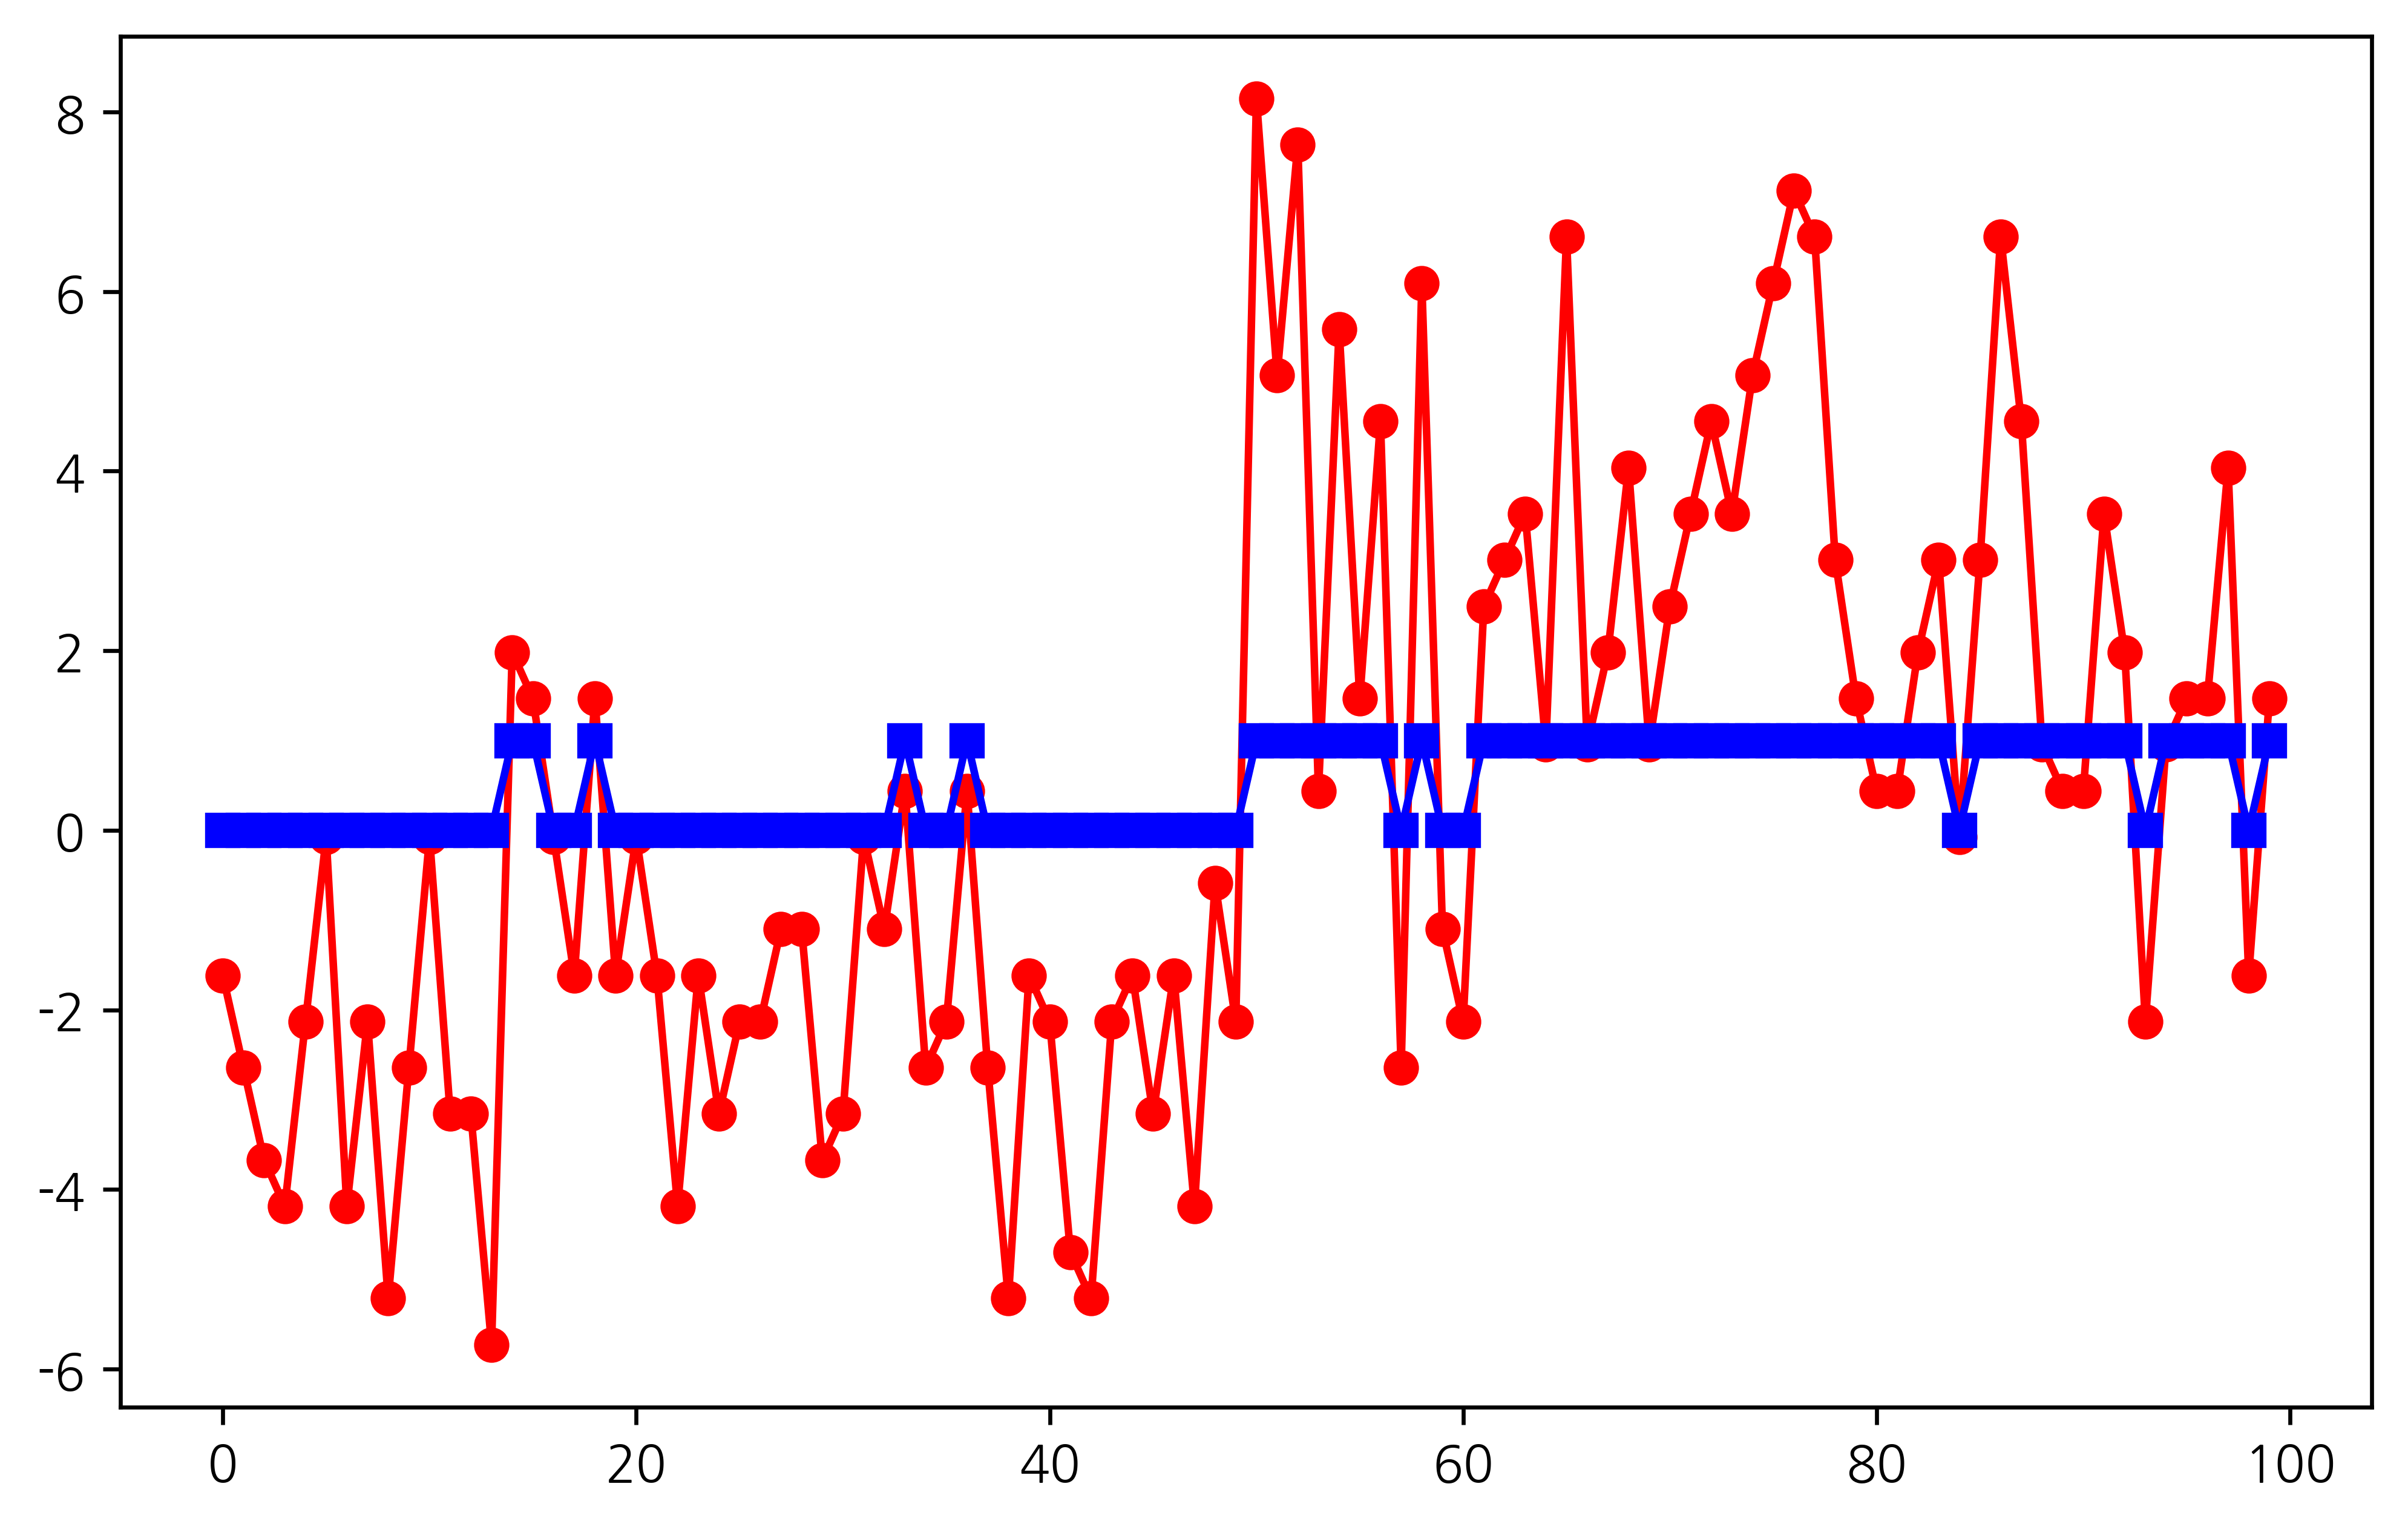

In [12]:
plt.plot(logit_res.fittedvalues, "ro-")
plt.plot(y_pred, "bs-")

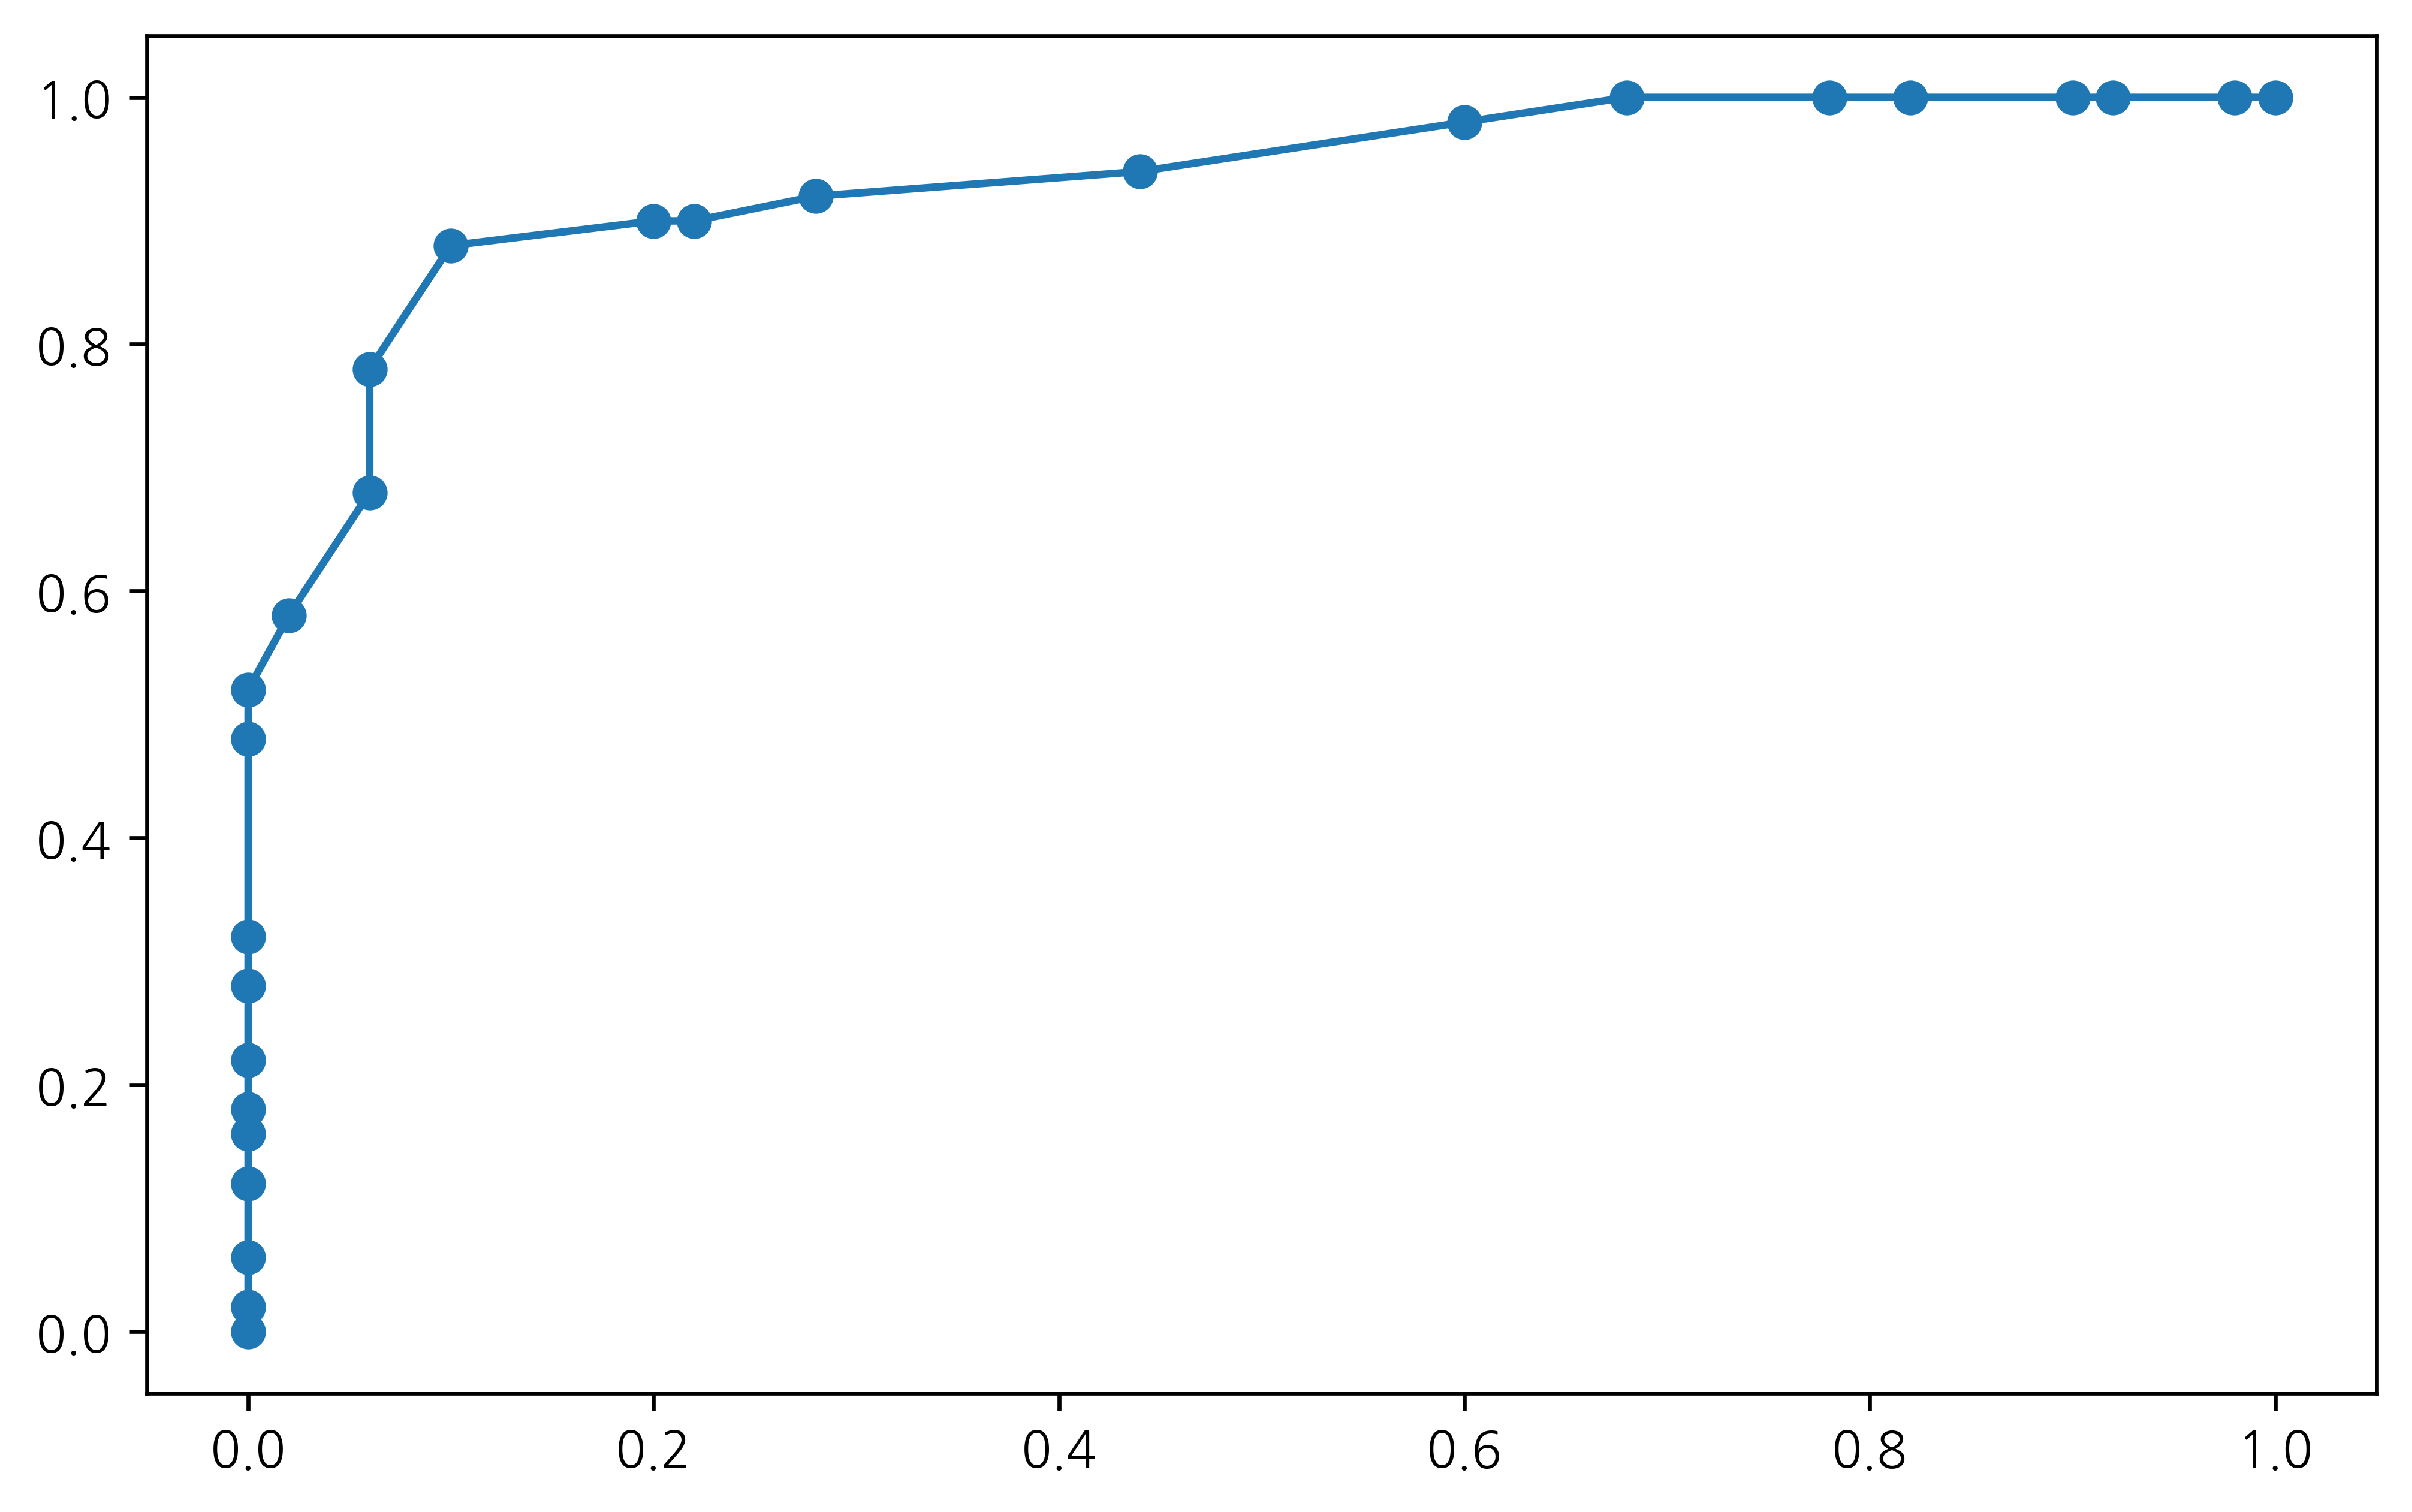

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)

plt.plot(fpr, tpr, 'o-')
plt.show()

연습문제 2

In [15]:
# from_formula 사용하려면 열이름에 (cm) 괄호가 있어 오류남. 이름 바꿔주고 사용해야함
iris = load_iris()
idx = np.in1d(iris.target, [1, 2]) # 0,1값만 가져오기
X0 = pd.DataFrame(iris.data[idx, ], columns=iris.feature_names)  #데이터 프레임으로 넣어주면 데이터 프레임 이름을 그대로 가져욘다?
X = sm.add_constant(X0)
y = iris.target[idx] - 1  # y데이터를 만들때 1,2 이렇게 나오니까 -1 해줌

In [17]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 May 2020   Pseudo R-squ.:                  0.9142
Time:                        21:13:56   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal length (cm)    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal width (cm)     -6.

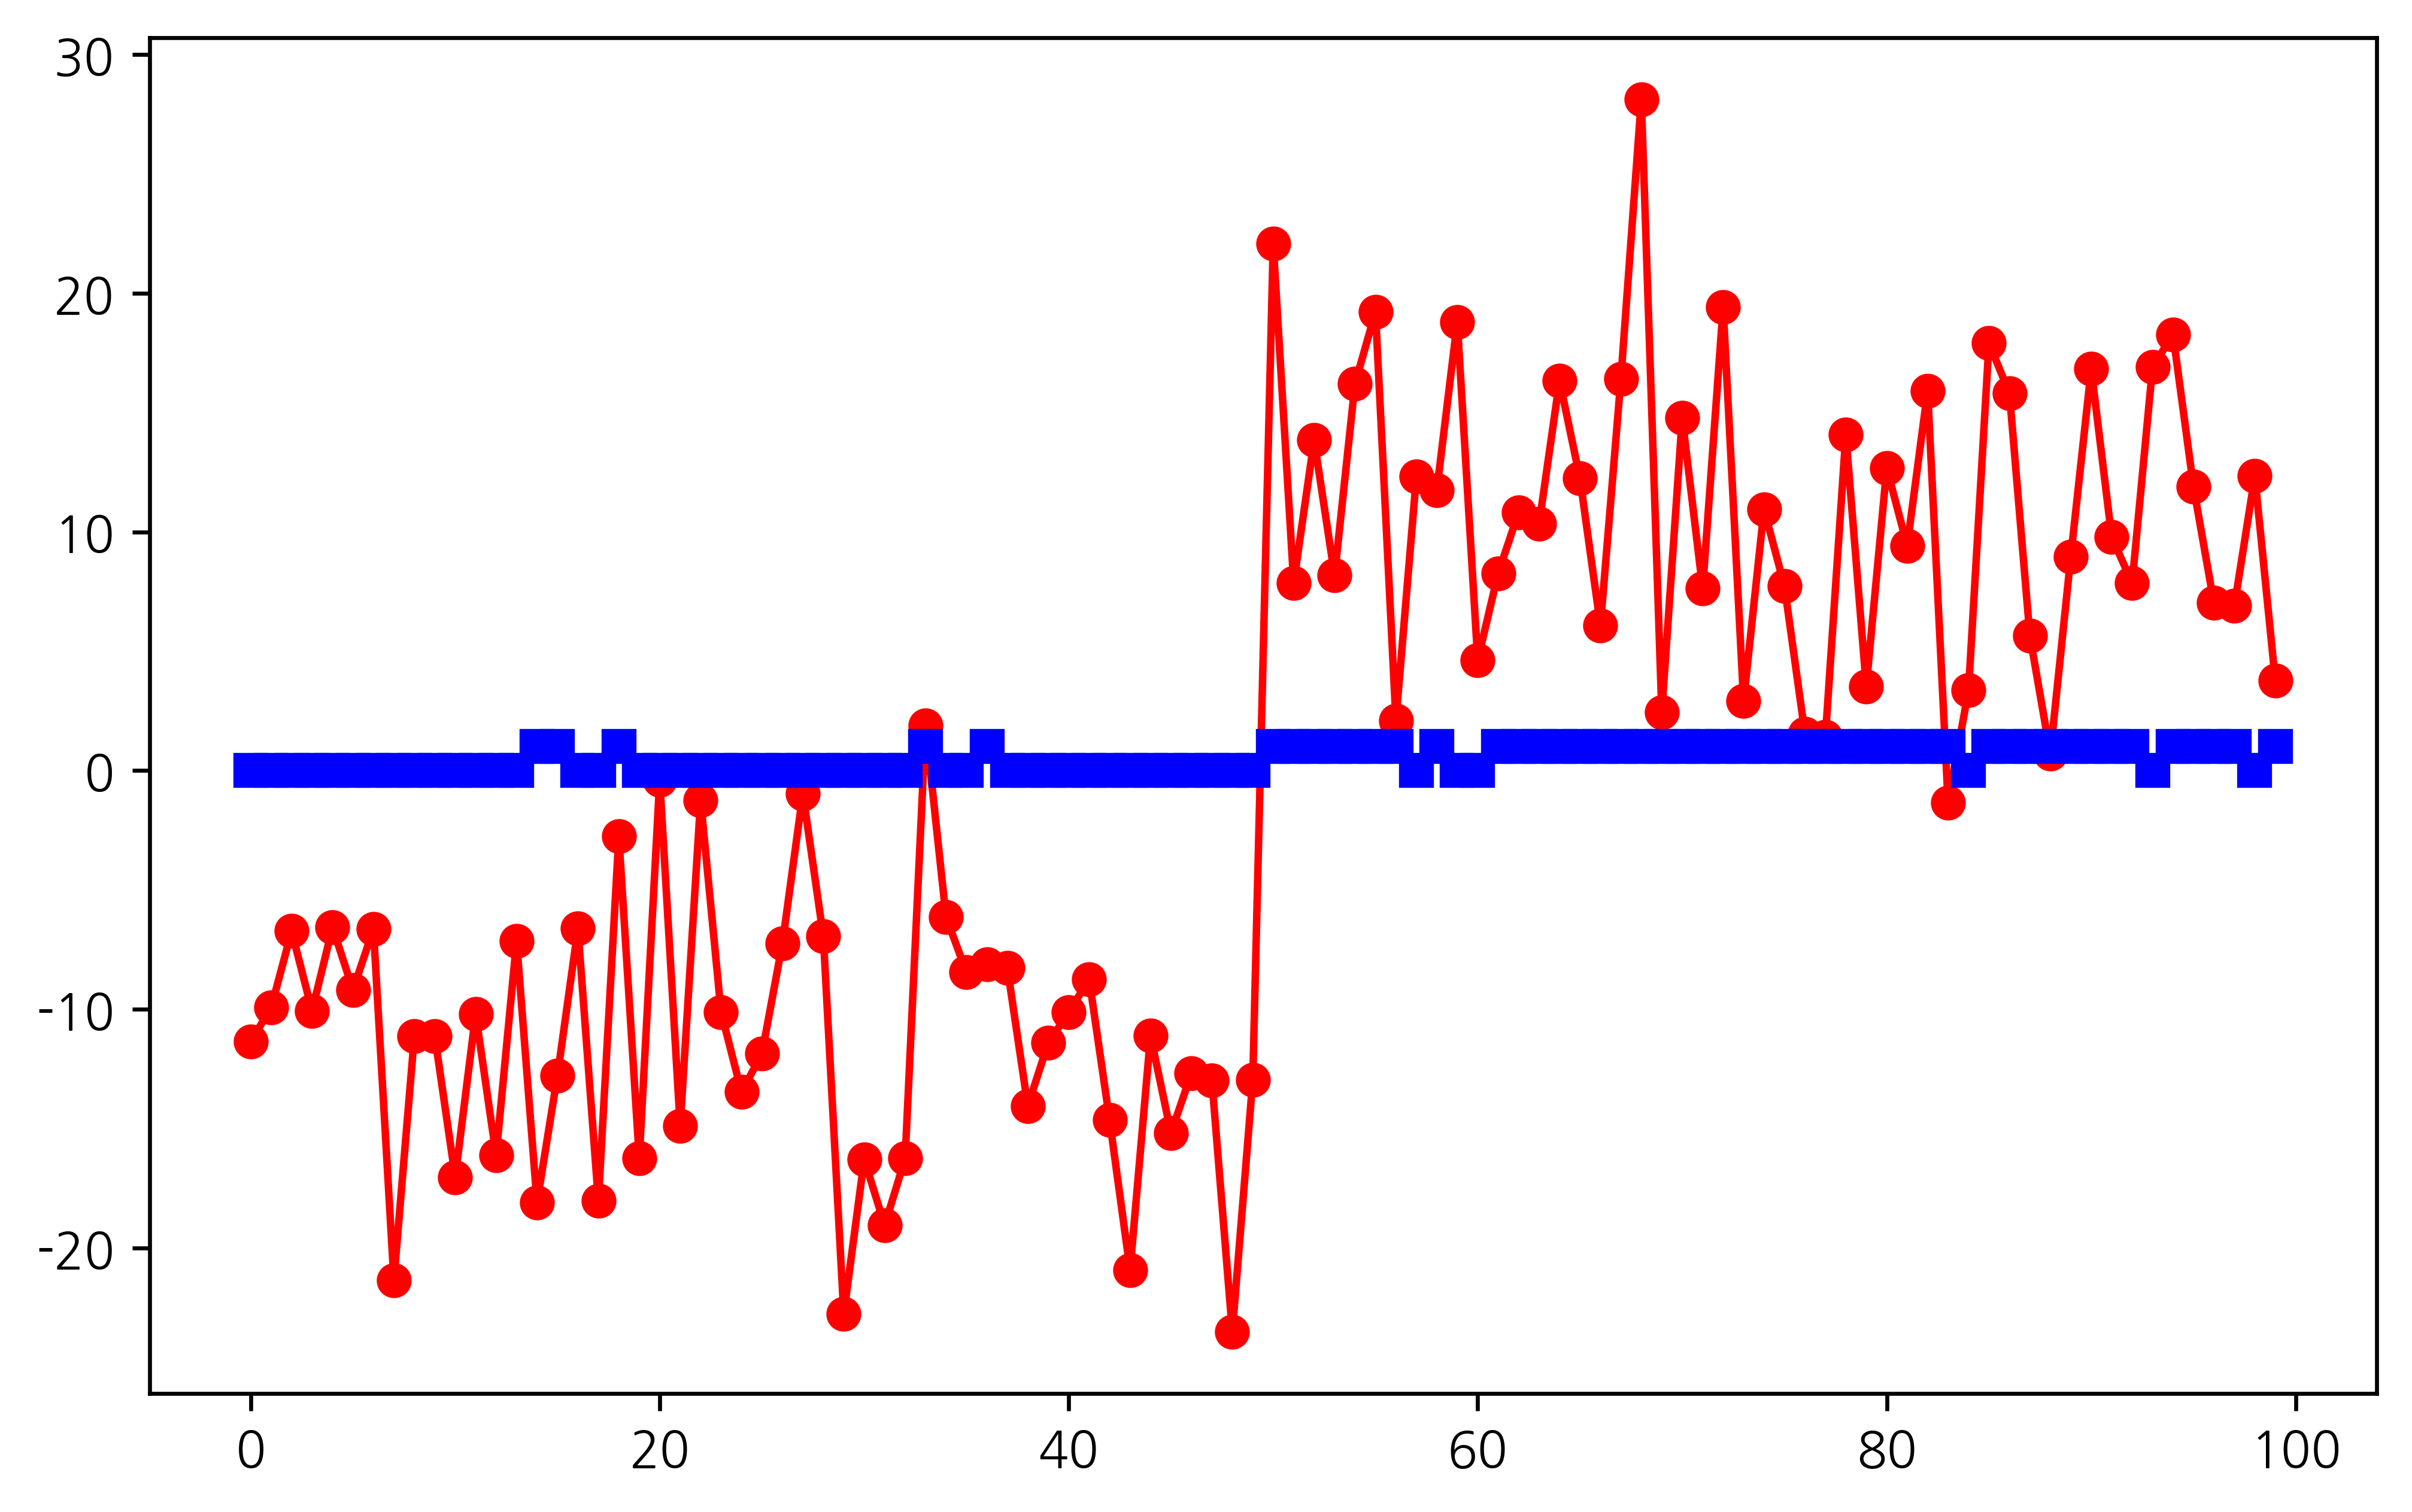

In [19]:
plt.plot(logit_res.fittedvalues, "ro-")
plt.plot(y_pred, "bs-")

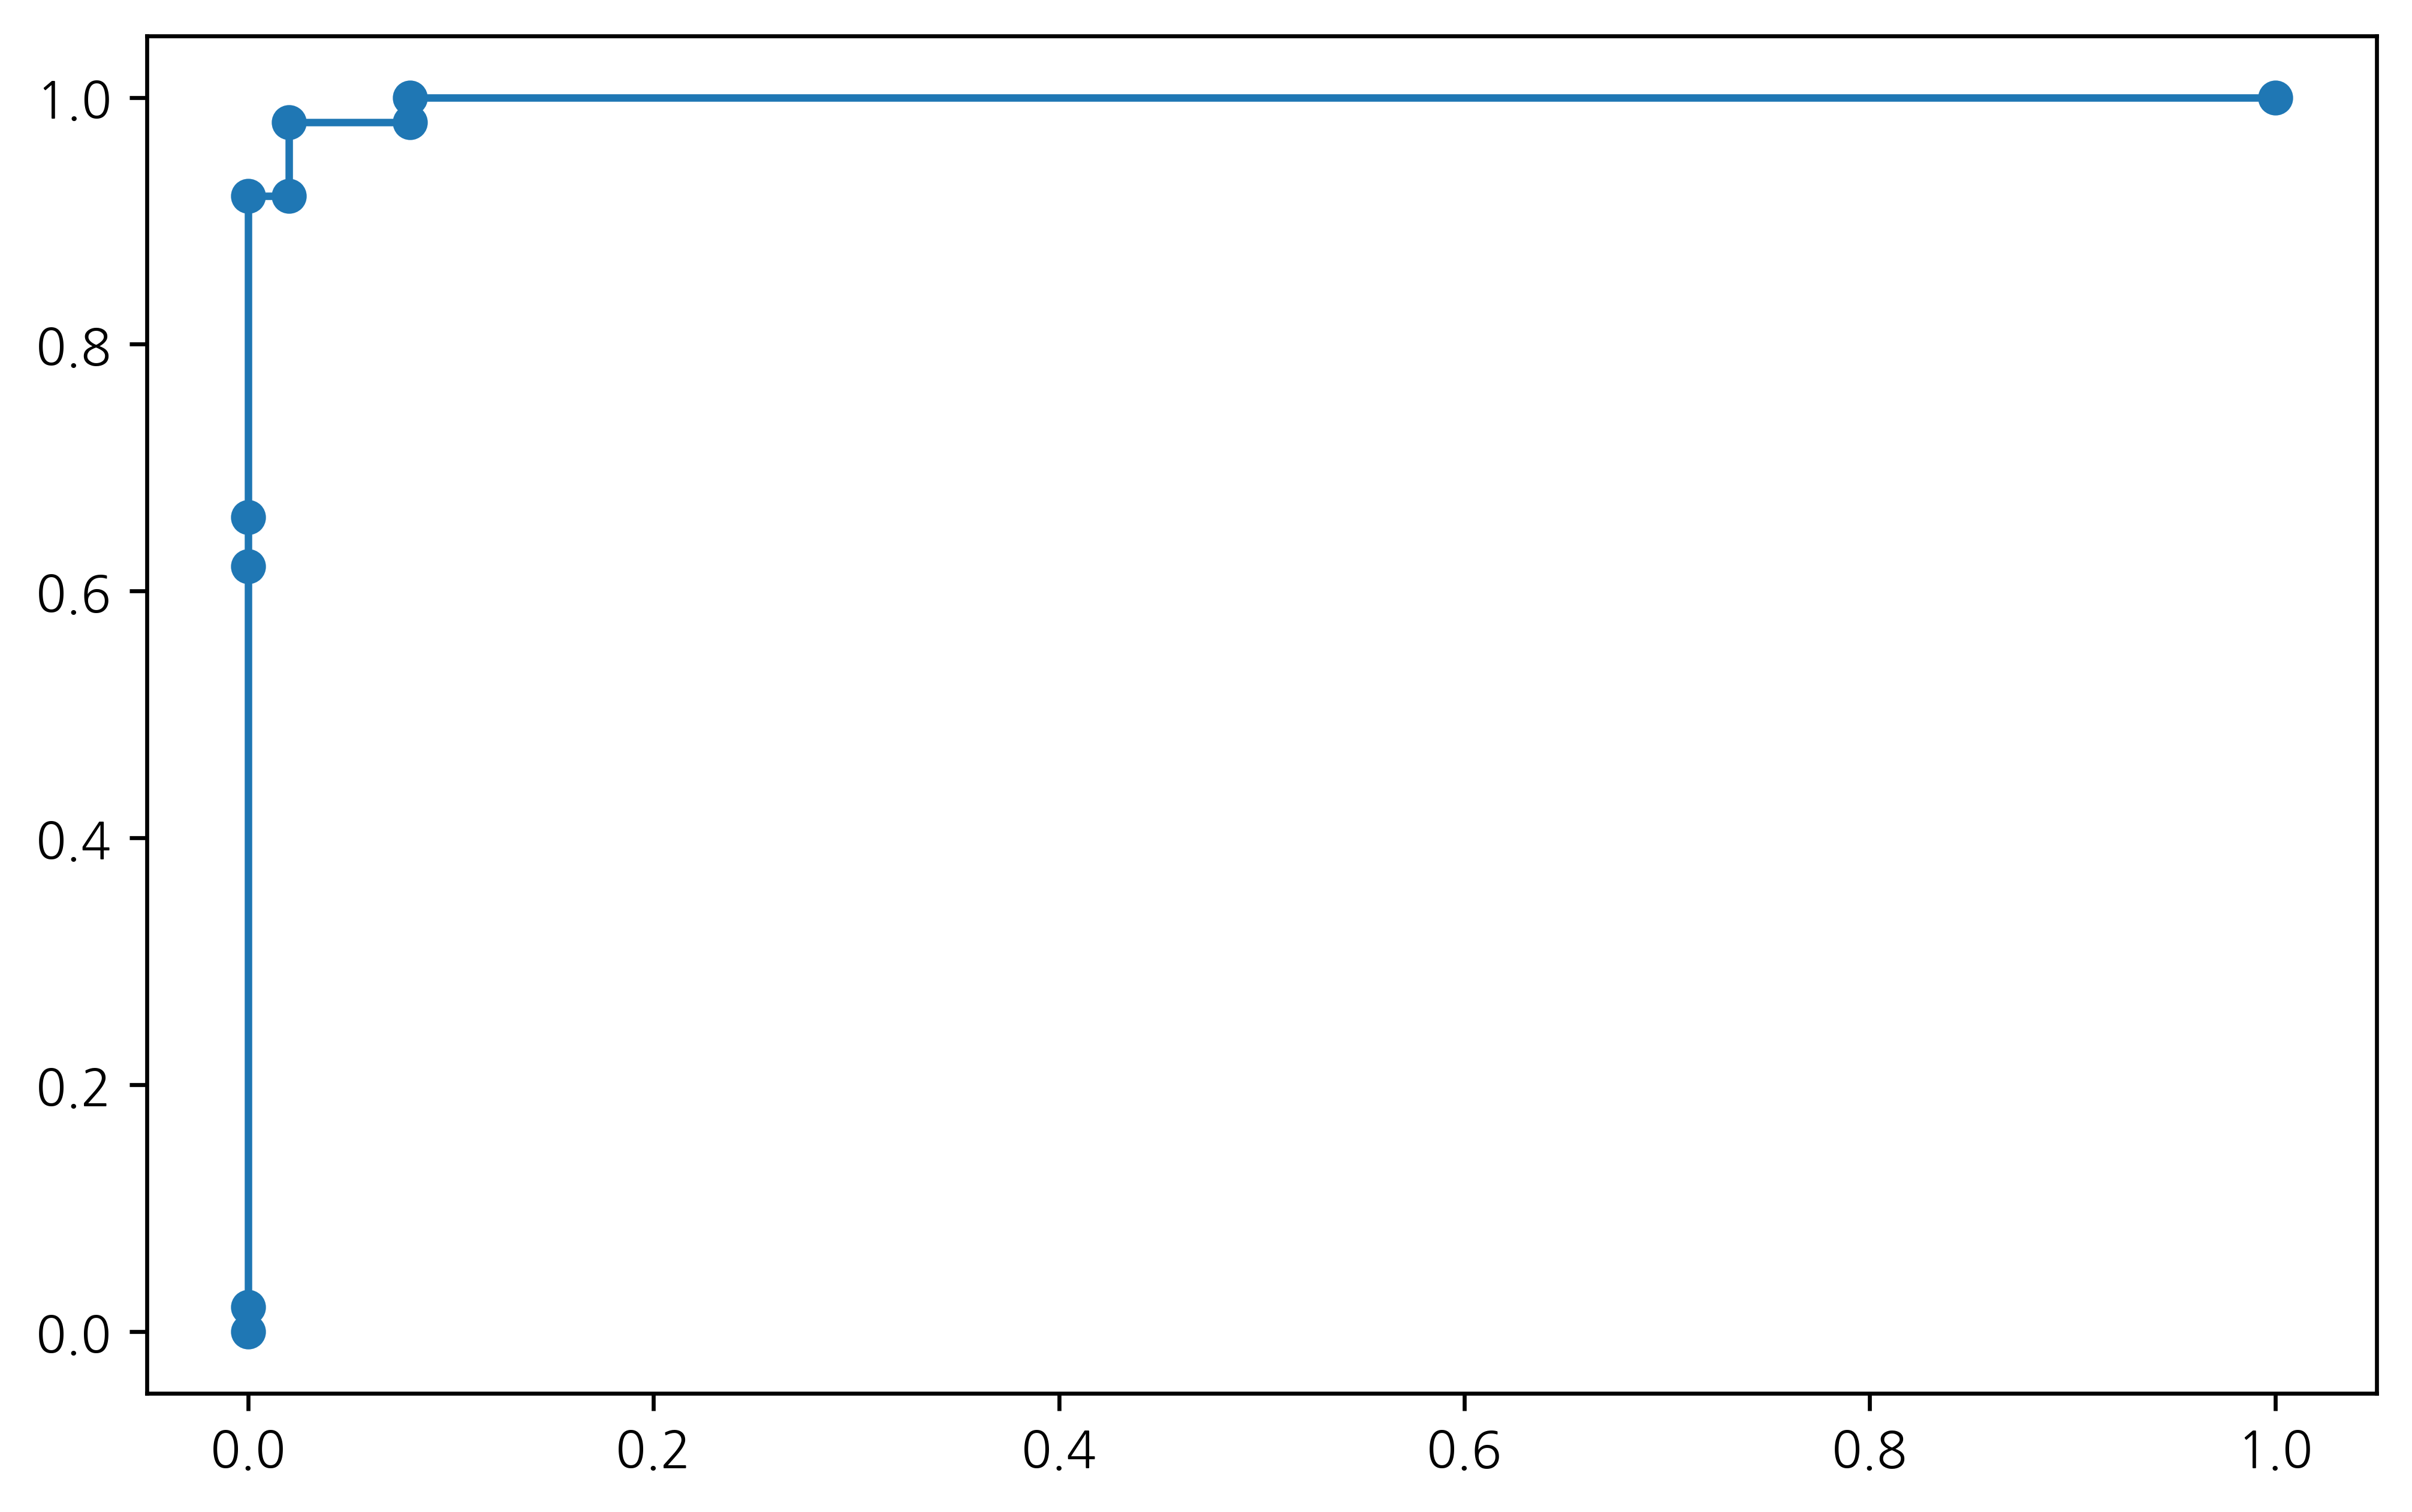

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)

plt.plot(fpr, tpr, 'o-')
plt.show()